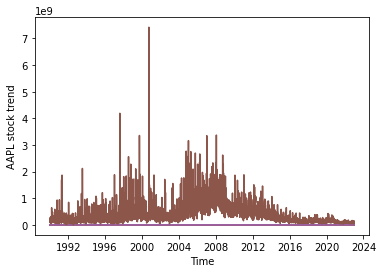

In [ ]:
import time
import pandas as pd
import datetime as dt
from fredapi import Fred
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
# Initialize the FRED API with your API key
fred = Fred(api_key='a28a1a156bcf84e0f9fef0821720ae76')
start = dt.datetime(1990, 1, 1)
end = dt.datetime(2022, 12, 31)
ticker = 'AAPL'
df = yf.download('AAPL',
start = start,
end= end,
progress=False)
df.to_csv('AAPL.csv')
gdp = fred.get_series('GDP',start=start, end=end)
inflation = fred.get_series('CPIAUCNS',start=start, end=end)
unemployment_rate = fred.get_series('UNRATE',start=start, end=end)
gdp.name = 'gdp_growth'
inflation.name = 'inflation'
unemployment_rate.name = 'unemployment_rate'
gdp.to_csv('gdp.csv')
inflation.to_csv('inflation.csv')
unemployment_rate.to_csv('unemployment_rate.csv')
data = gdp.to_frame().join(df, how='outer')
data = inflation.to_frame().join(data, how='outer')
data = unemployment_rate.to_frame().join(data, how='outer')
data.to_csv('y.csv')
data = data.interpolate(method='linear')
plt.plot(df)
plt.xlabel('Time')
plt.ylabel('AAPL stock trend')
plt.show()

In [ ]:
pip install fredapi

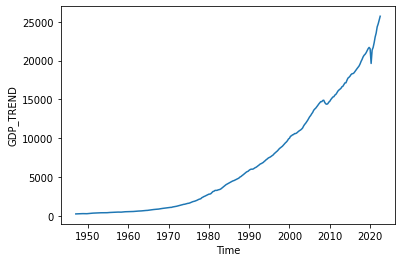

In [ ]:
plt.plot(gdp)
plt.xlabel('Time')
plt.ylabel('GDP_TREND')
plt.show()

In [ ]:
pip install statsmodels


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(df['Close'])

1. ADF :  1.1248959713536029
2. P-Value :  0.9954235977267152
3. Num Of Lags :  34
4. Num Of Observations Used For ADF Regression: 8280
5. Critical Values :
	 1% :  -3.4311400155136837
	 5% :  -2.8618891318764113
	 10% :  -2.5669558380738176


In [ ]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['Close'], trace=True,suppress_warnhings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=7.12 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=27739.356, Time=0.17 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=25192.137, Time=0.22 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=1.79 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=24190.533, Time=0.59 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=23547.224, Time=0.82 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=22975.493, Time=1.00 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=22789.778, Time=1.27 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=7.52 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=5.23 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=22791.778, Time=2.71 sec

Best model:  ARIMA(5,2,0)(0,0,0)[0]          
Total fit time: 28.484 seconds


In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 51.4 MB/s eta 0:00:00


In [ ]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(8315, 6)
(8285, 6) (30, 6)


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['Close'],order=(5,2,0))
model=model.fit()
model.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 8285
Model:                 ARIMA(5, 2, 0)   Log Likelihood              -11204.319
Date:                Sat, 14 Jan 2023   AIC                          22420.638
Time:                        08:22:36   BIC                          22462.770
Sample:                             0   HQIC                         22435.034
                               - 8285                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8958      0.003   -288.350      0.000      -0.902      -0.890
ar.L2         -0.7367      0.004   -180.531      0.000      -0.745      -0.729
ar.L3         -0.5750      0.004   -137.720      0.000      -0.583      -0.567
ar.L4         -0.3758      0.004    -96.334      0.000      -0.383      -0.368
ar.L5         -0.1435      0.003    -43.428      0.000      -0.150      -0.137
sigma2         0.8758      0.003    292.811      0.000       0.870       0.882
===================================================================================
Ljung-Box (L1) (Q):                   5.07   Jarque-Bera (JB):            612852.13
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):            6612.12   Skew:                             0.63
Prob(H) (two-sided):                  0.00   Kurtosis:                        45.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
pip install fredapi

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


8285    151.395779
8286    153.849971
8287    154.745089
8288    155.606086
8289    156.716618
8290    158.028710
8291    159.603617
8292    160.887736
8293    162.033955
8294    163.255266
8295    164.550416
8296    165.874932
8297    167.169122
8298    168.417965
8299    169.674362
8300    170.953204
8301    172.239629
8302    173.519774
8303    174.790723
8304    176.060658
8305    177.335816
8306    178.613602
8307    179.890126
8308    181.164542
8309    182.438448
8310    183.713352
8311    184.989046
8312    186.264564
8313    187.539578
8314    188.814417
Name: ARIMA Predictions, dtype: float64

Sentiment Anylasis

In [ ]:
from newsapi.newsapi_client import NewsApiClient
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the News API client
newsapi = NewsApiClient(api_key='a6cb0761ca8c4266a61d317844bc25f5')

# Search for news articles about Apple stock
stock = 'AAPL'
articles = newsapi.get_everything(q=stock, language='en', sort_by='relevancy')
import nltk
nltk.download('vader_lexicon')
# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Analyze the sentiment of each article
sentiment_list = []
for article in articles['articles']:
    text = article['content']
    sentiment = sia.polarity_scores(text)['compound']
    sentiment_list.append(sentiment)

# Calculating the average sentiment
avg_sentiment = sum(sentiment_list) / len(sentiment_list)
print(f'The average sentiment for the stock {stock} is: {avg_sentiment}')

The average sentiment for the stock AAPL is: 0.12708999999999995


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
pip install newsapi-python

Incorporating sentiment on stock

In [ ]:
if avg_sentiment>0:
  print('Market is good to Trade as per sentiment Market will go up')
elif avg_sentiment<0:
  print('Market is not good to trade on AAPL sticker')

Market is good to Trade as per sentiment Market will go up


Competitor analysis on AAPL stock

In [ ]:
import pandas as pd
import pandas_datareader as pdr

# Get financial data for Apple and its competitors
ticker = ['AAPL', 'AMZN', 'GOOGL', 'MSFT']
financial_data = yf.download(ticker)

# Calculate market share for each company
market_share = financial_data['Close'].mean()
market_share = market_share.sort_values(ascending=False)

# Print the market share for each company
print("Market Share:")
print(market_share)

# Calculate the correlation between Apple's stock price and its competitors'
correlation = financial_data['Close'].corr()

# Print the correlation between Apple's stock price and its competitors'
print("\nStock Price Correlation:")
print(correlation)

[*********************100%***********************]  4 of 4 completed
Market Share:
MSFT     46.083794
GOOGL    37.861003
AMZN     31.023559
AAPL     16.572531
dtype: float64

Stock Price Correlation:
           AAPL      AMZN     GOOGL      MSFT
AAPL   1.000000  0.947181  0.972192  0.976260
AMZN   0.947181  1.000000  0.955856  0.959537
GOOGL  0.972192  0.955856  1.000000  0.978124
MSFT   0.976260  0.959537  0.978124  1.000000


Demand forecasting

In [ ]:
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
print('next predictions on price')
print(pred)

next predictions on price
8285    151.395779
8286    153.849971
8287    154.745089
8288    155.606086
8289    156.716618
8290    158.028710
8291    159.603617
8292    160.887736
8293    162.033955
8294    163.255266
8295    164.550416
8296    165.874932
8297    167.169122
8298    168.417965
8299    169.674362
8300    170.953204
8301    172.239629
8302    173.519774
8303    174.790723
8304    176.060658
8305    177.335816
8306    178.613602
8307    179.890126
8308    181.164542
8309    182.438448
8310    183.713352
8311    184.989046
8312    186.264564
8313    187.539578
8314    188.814417
Name: ARIMA Predictions, dtype: float64


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Supply chain analysis

In [ ]:
import pandas as pd

# Read the financial data from a CSV file
financial_data = pd.read_csv("/content/AAPL.csv")
y = financial_data['Open']
# Calculate the total revenue for the company
total_revenue = y.sum()
y1 = financial_data['Close']
# Calculate the total expenses for the company
total_expenses = y1.sum()

# Calculate the net income for the company
net_income = total_revenue - total_expenses

# Print the net income
print("Net Income:", net_income)


Net Income: -73.68338958919048


Decision abouth your trade will depend on Net income untill now

In [ ]:
if net_income>0:
  print('stock is in demand')
else:
  print('stock is not in demand')

stock is not in demand


Customer segmentation

In [ ]:
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load customer data
data = pd.read_csv("/content/AAPL.csv")

# Segment customers using k-means
kmeans = KMeans(n_clusters=3)
data["segment"] = kmeans.fit_predict(data[["Open", "Close", "Adj Close"]])

# Train a logistic regression model on the segmented data
X = data[["segment", "Open"]]
y = data["Close"].apply(lambda x: 1 if x>10 else 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict likelihood of purchasing AAPL stock at different price points for each segment
segment_0 = model.predict_proba([[0, 5], [0, 10], [0, 20]])
segment_1 = model.predict_proba([[1, 20], [1, 10], [1, 15]])
segment_2 = model.predict_proba([[2, 100], [2, 110], [2, 120]])
segment_0

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[9.99999997e-01, 2.63113314e-09],
       [5.51640518e-01, 4.48359482e-01],
       [0.00000000e+00, 1.00000000e+00]])

Price elasticity analysis

In [ ]:
import pandas_datareader as pdr
import numpy as np

# Retrieve the historical data for AAPL stock
stock_data = pd.read_csv('/content/AAPL.csv')

# Calculate the percentage change in closing price
stock_data["price_change"] = stock_data["Close"].pct_change()

# Calculate the percentage change in trading volume
stock_data["quantity_change"] = stock_data["Volume"].pct_change()

# Calculate the price elasticity of demand
stock_data["price_elasticity"] = stock_data["quantity_change"] / stock_data["price_change"]

# Print the results
print(stock_data[["price_elasticity"]])


      price_elasticity
0                  NaN
1            20.169285
2            19.481544
3          -133.447416
4           -26.622350
...                ...
8310         64.438311
8311         -5.863399
8312         -7.759364
8313         -4.022626
8314          6.724855

[8315 rows x 1 columns]


Promotional pricing

In [ ]:
import pandas_datareader as pdr
import numpy as np

# Retrieve the historical data for AAPL stock
stock_data = pd.read_csv('/content/AAPL.csv')

# Set the promotional price
promotional_price = stock_data["Close"].mean() * 0.9

# Calculate the percentage change in sales
stock_data["sales_change"] = (stock_data["Close"] - promotional_price) / stock_data["Close"]

# Print the results
print(stock_data[["sales_change"]])

      sales_change
0       -55.705082
1       -55.327075
2       -55.139783
3       -54.953900
4       -54.585809
...            ...
8310      0.856973
8311      0.854960
8312      0.850369
8313      0.854490
8314      0.854849

[8315 rows x 1 columns]


OPTIMAL PRICING FOR SALE

In [ ]:
y5 = stock_data[["sales_change"]]
y3 = pd.read_csv('/content/AAPL.csv')['Close']
for i in range(len(y5.sales_change)):
  if y5.sales_change[i]>0.8:
    print('promotional prices you can consider',y3[i])

promotional prices you can consider 95.34249877929688
promotional prices you can consider 95.75250244140624
promotional prices you can consider 95.91999816894533
promotional prices you can consider 95.47750091552734
promotional prices you can consider 97.05750274658205
promotional prices you can consider 97.7249984741211
promotional prices you can consider 96.52249908447266
promotional prices you can consider 96.32749938964844
promotional prices you can consider 98.35749816894533
promotional prices you can consider 97.0
promotional prices you can consider 97.27249908447266
promotional prices you can consider 94.80999755859376
promotional prices you can consider 95.04000091552734
promotional prices you can consider 96.19000244140624
promotional prices you can consider 106.26000213623048
promotional prices you can consider 108.9375
promotional prices you can consider 109.66500091552734
promotional prices you can consider 110.0625
promotional prices you can consider 113.90249633789062
pro